In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd

In [3]:
import sys
sys.path.append('../')
from src import utils, Inference, configs

## Pixel Hold Out Performance

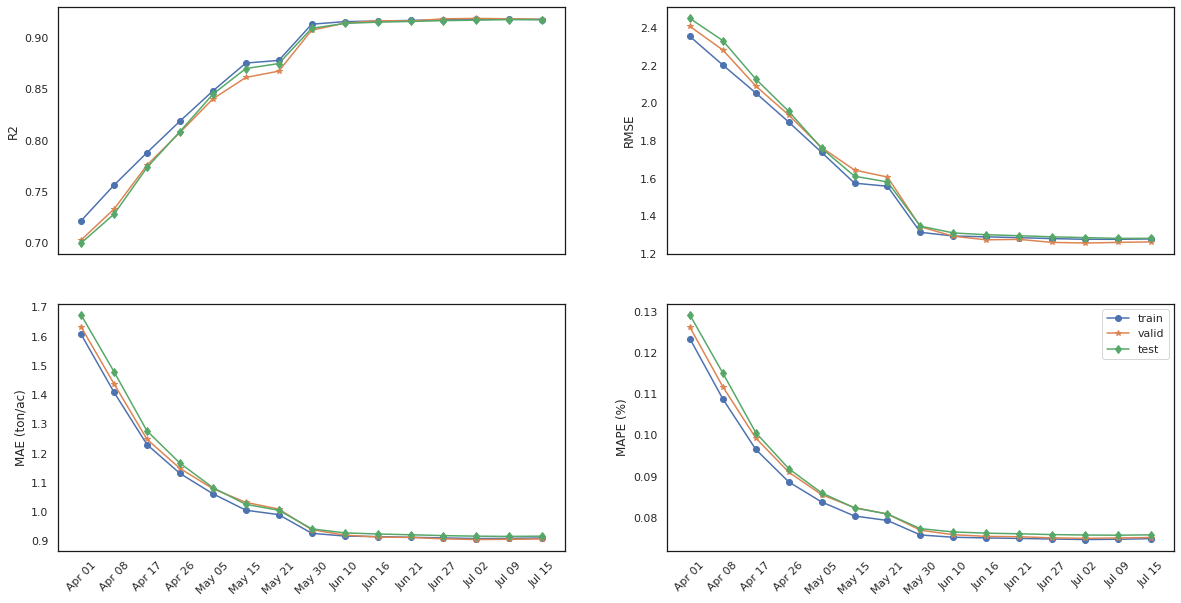

In [10]:
S1_train_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_train.csv', index_col=0)
S1_valid_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_valid.csv', index_col=0) 
S1_test_df  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_test.csv',  index_col=0) 

R_S1 = Inference.time_series_evaluation_plots(S1_train_df, S1_valid_df, S1_test_df, 'test', save = False)

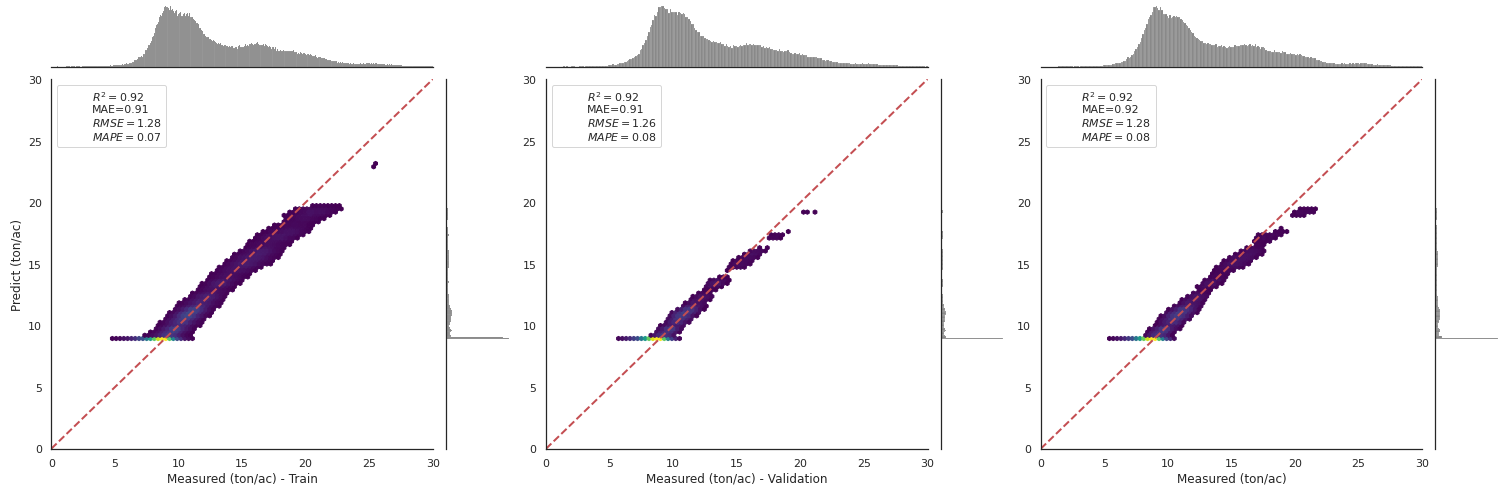

In [7]:
_ = Inference.train_val_test_satterplot(S1_train_df, S1_valid_df, S1_test_df, week = 15, cmap  = 'viridis', mincnt = 2000)

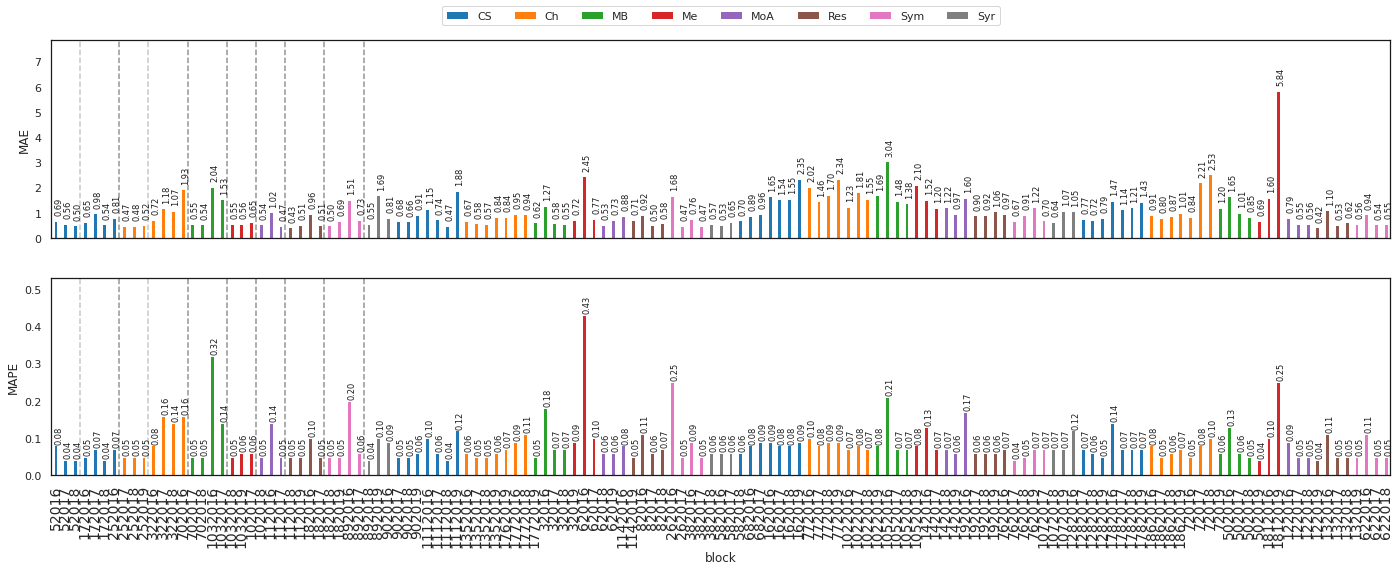

In [22]:
source = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_test_bc1.csv')
S1_time_blocks, S1_time_cultivars = Inference.block_cultivar_test_csv_results_2d(source, week = 'ypred_w15', 
                                                                                save_dir = './EXPs/EXP_S1_UNetLSTM_10m_time', 
                                                                                save_csv_name = 'ConvLSTM_10m_time_')

_ = Inference.block_eval_barplot(S1_time_blocks, cultivar_list = None, block_list = None)

## Year Hold Out Performance 

#### test: 2016 

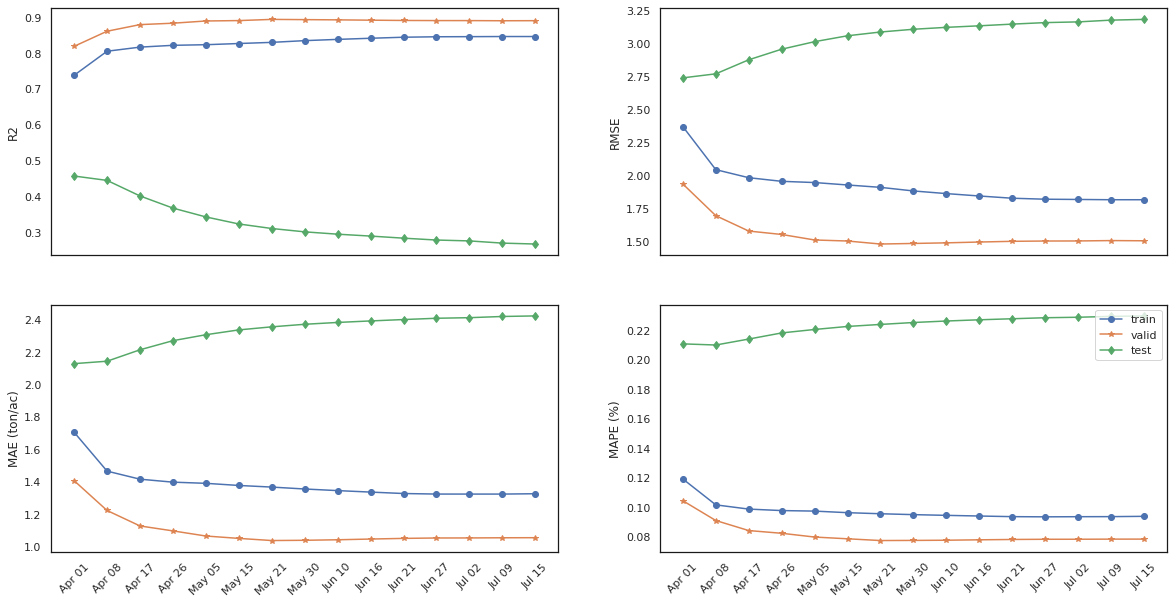

In [11]:
S2_train_df_Y1716 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1716 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1716  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_test.csv',  index_col=0) 

R_Y1716 = Inference.time_series_evaluation_plots(S2_train_df_Y1716, S2_valid_df_Y1716, S2_test_df_Y1716, 'test', save = False)

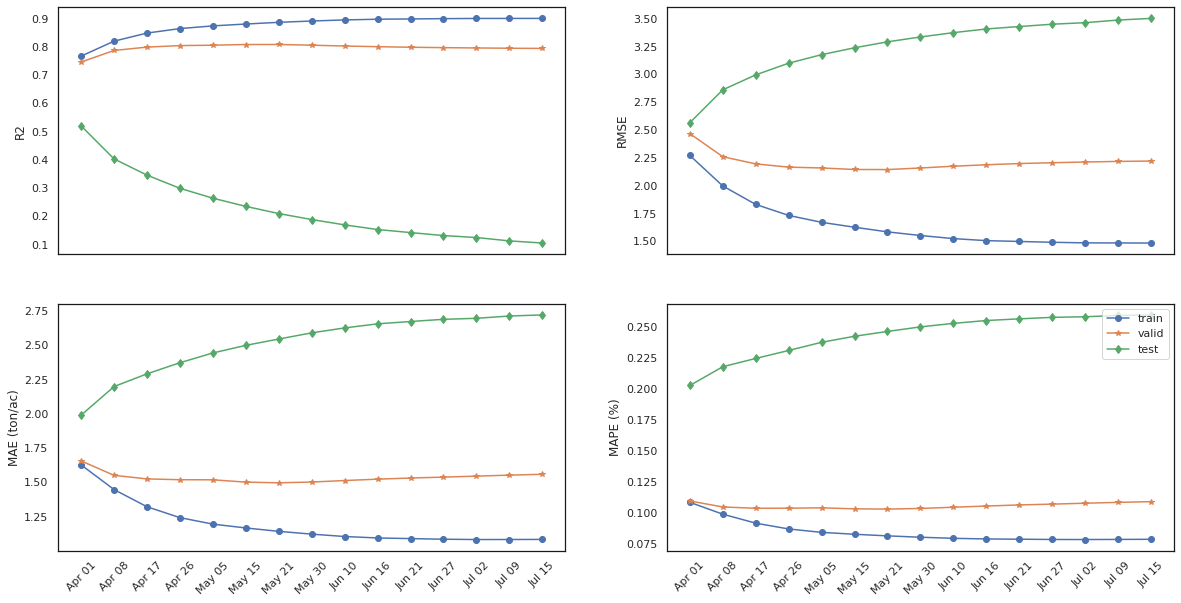

In [12]:
S2_train_df_Y1816 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1816 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1816  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_test.csv',  index_col=0) 
R_Y1816 = Inference.time_series_evaluation_plots(S2_train_df_Y1816, S2_valid_df_Y1816, S2_test_df_Y1816, 'test', save = False)

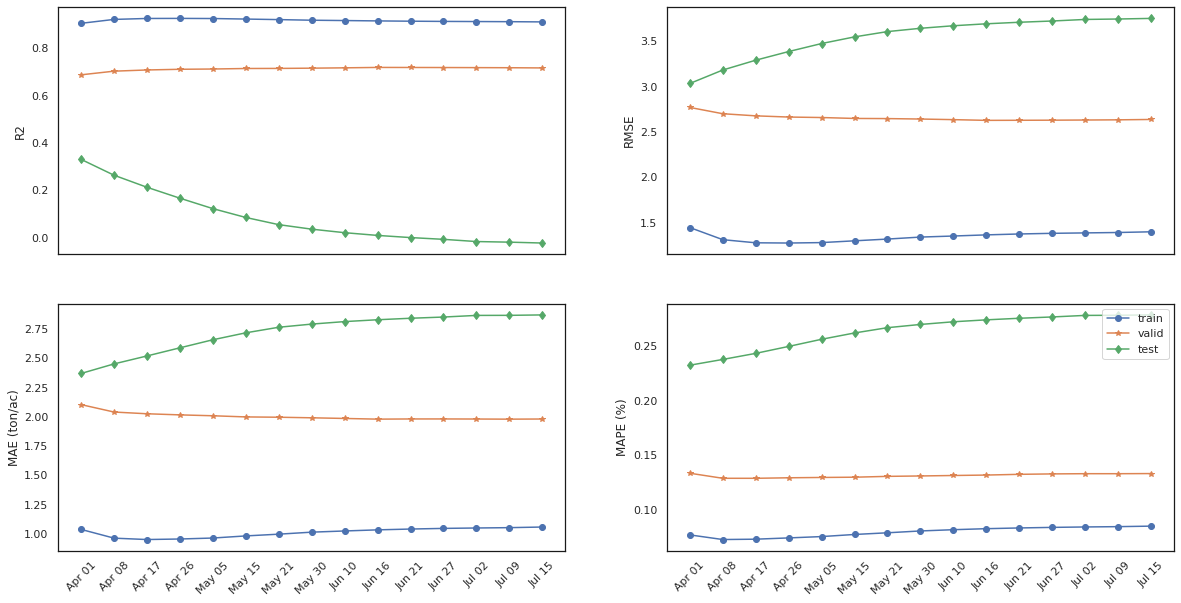

In [13]:
S2_train_df_Y1916 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1916 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1916  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_test.csv',  index_col=0) 
R_Y1916 = Inference.time_series_evaluation_plots(S2_train_df_Y1916, S2_valid_df_Y1916, S2_test_df_Y1916, 'test', save = False)

#### Test: 2017

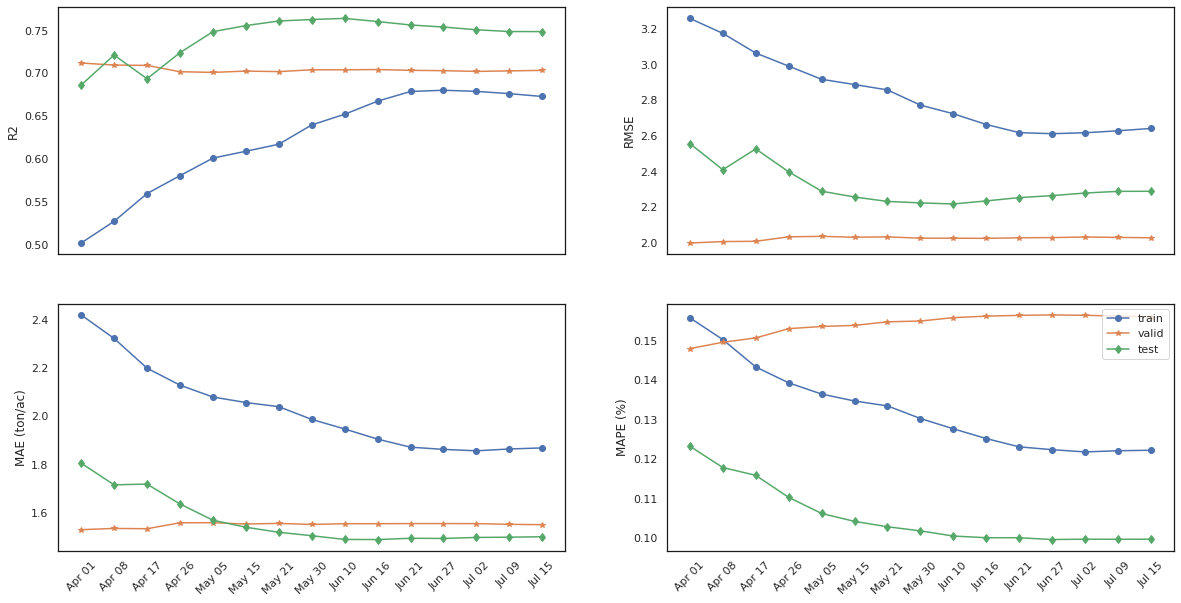

In [14]:
S2_train_df_Y1617 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1617 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1617  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_test.csv',  index_col=0) 
R_Y1617 = Inference.time_series_evaluation_plots(S2_train_df_Y1617, S2_valid_df_Y1617, S2_test_df_Y1617, 'test', save = False)

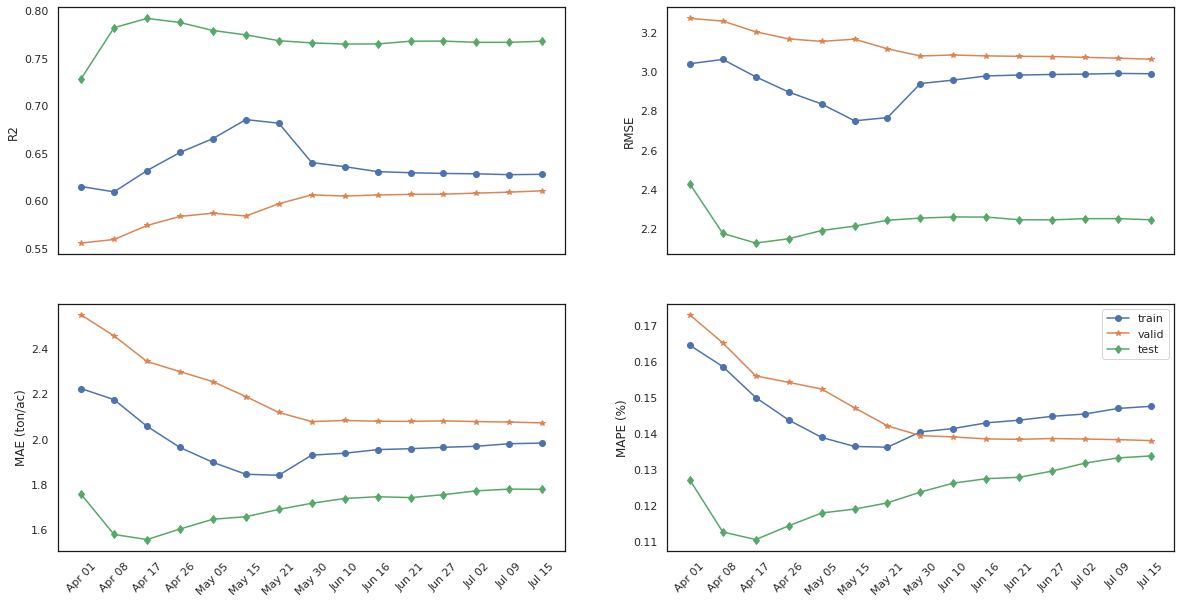

In [15]:
S2_train_df_Y1817 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1817 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1817  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_test.csv',  index_col=0) 
R_Y1817 = Inference.time_series_evaluation_plots(S2_train_df_Y1817, S2_valid_df_Y1817, S2_test_df_Y1817, 'test', save = False)

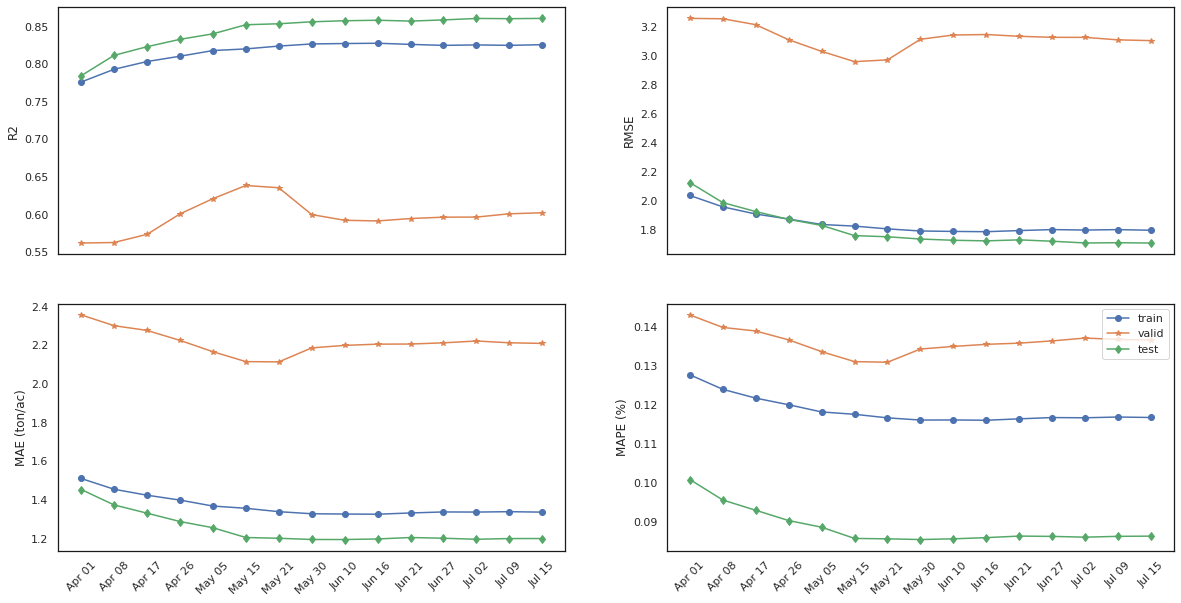

In [16]:
S2_train_df_Y1917 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1917 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1917  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_test.csv',  index_col=0) 
R_Y1917 = Inference.time_series_evaluation_plots(S2_train_df_Y1917, S2_valid_df_Y1917, S2_test_df_Y1917, 'test', save = False)

#### Year 2018

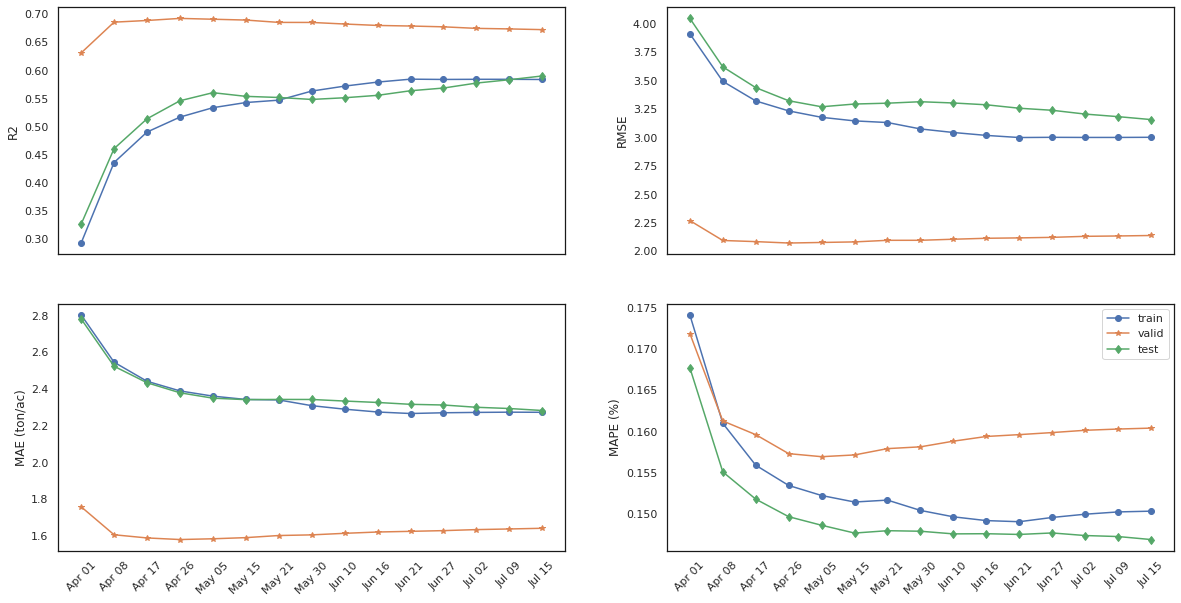

In [17]:
S2_train_df_Y1618 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1618 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1618  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_test.csv',  index_col=0) 
R_Y1618 = Inference.time_series_evaluation_plots(S2_train_df_Y1618, S2_valid_df_Y1618, S2_test_df_Y1618, 'test', save = False)

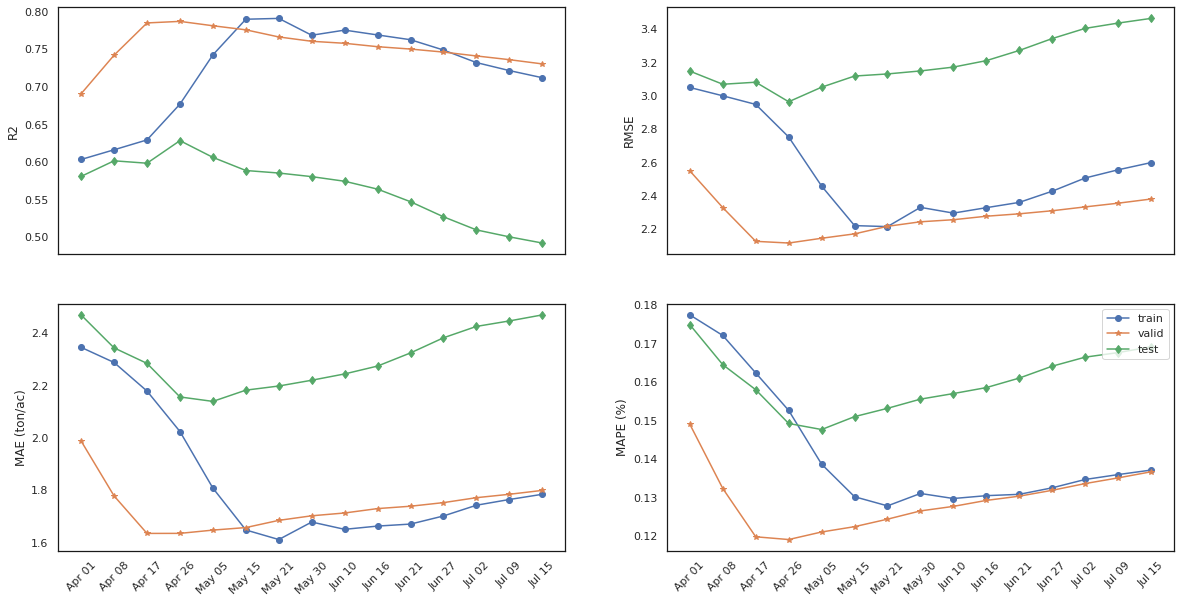

In [18]:
S2_train_df_Y1718 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1718 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1718  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_test.csv',  index_col=0) 
R_Y1718 = Inference.time_series_evaluation_plots(S2_train_df_Y1718, S2_valid_df_Y1718, S2_test_df_Y1718, 'test', save = False)

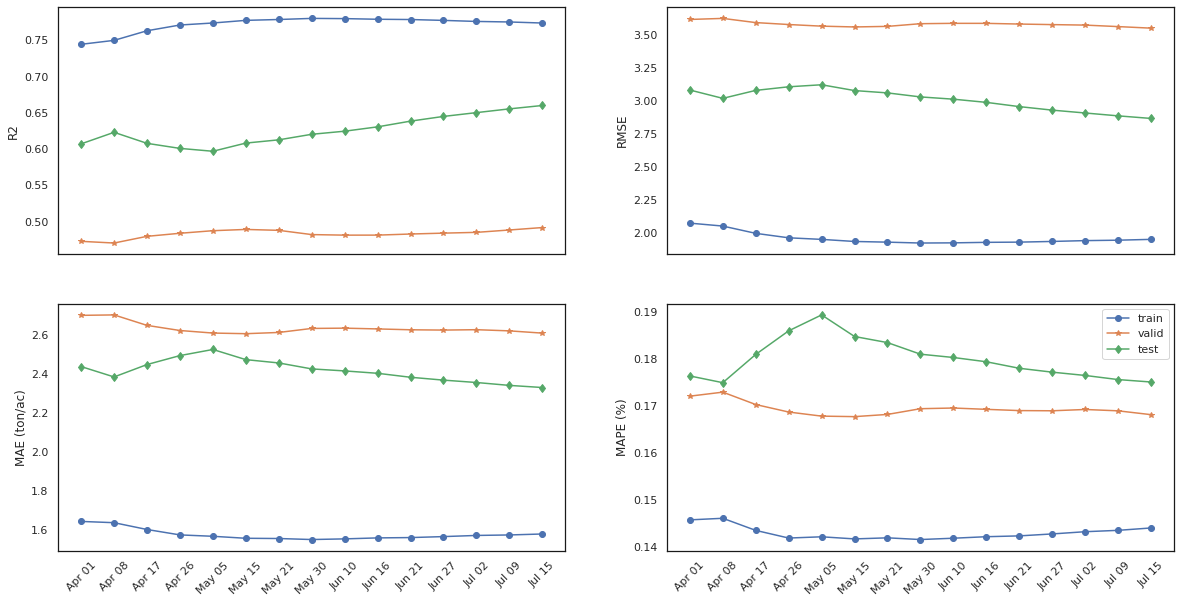

In [19]:
S2_train_df_Y1918 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1918 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1918  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_test.csv',  index_col=0) 
R_Y1918 = Inference.time_series_evaluation_plots(S2_train_df_Y1918, S2_valid_df_Y1918, S2_test_df_Y1918, 'test', save = False)

####  Year 2019

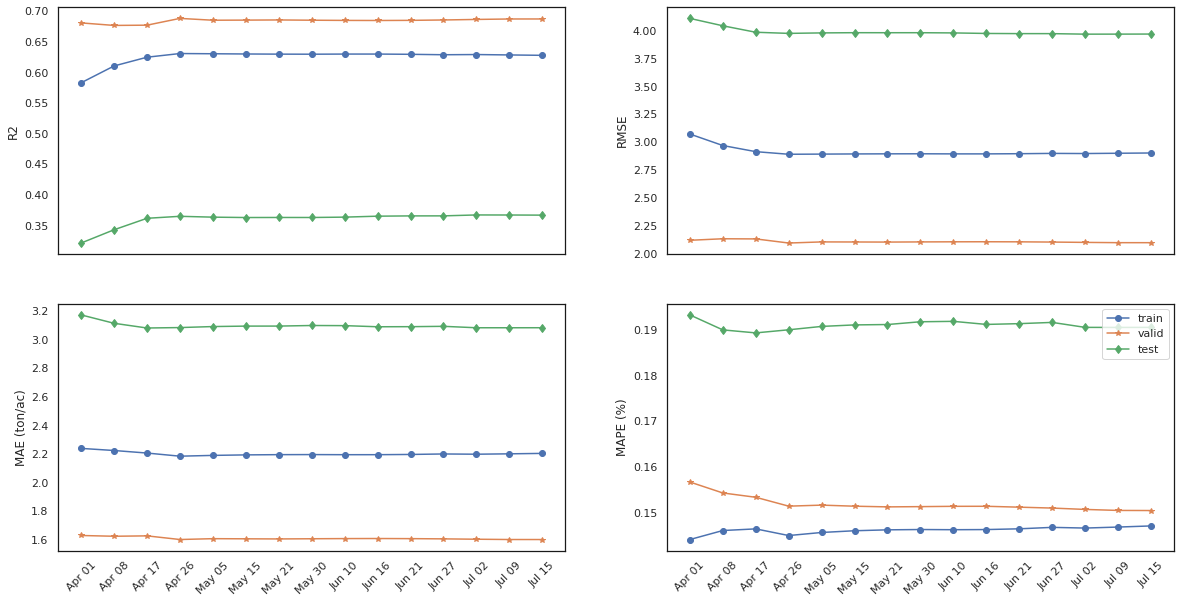

In [20]:
S2_train_df_Y1619 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1619 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1619  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_test.csv',  index_col=0) 
R_Y1619 = Inference.time_series_evaluation_plots(S2_train_df_Y1619, S2_valid_df_Y1619, S2_test_df_Y1619, 'test', save = False)

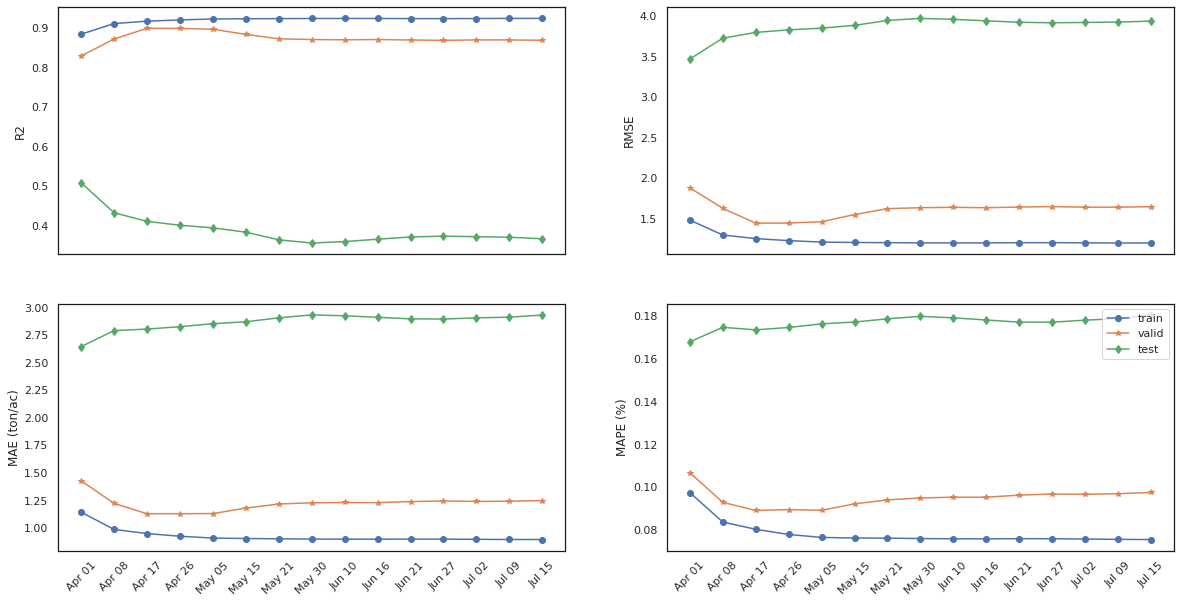

In [21]:
S2_train_df_Y1719 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1719 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1719  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_test.csv',  index_col=0) 
R_Y1719 = Inference.time_series_evaluation_plots(S2_train_df_Y1719, S2_valid_df_Y1719, S2_test_df_Y1719, 'test', save = False)

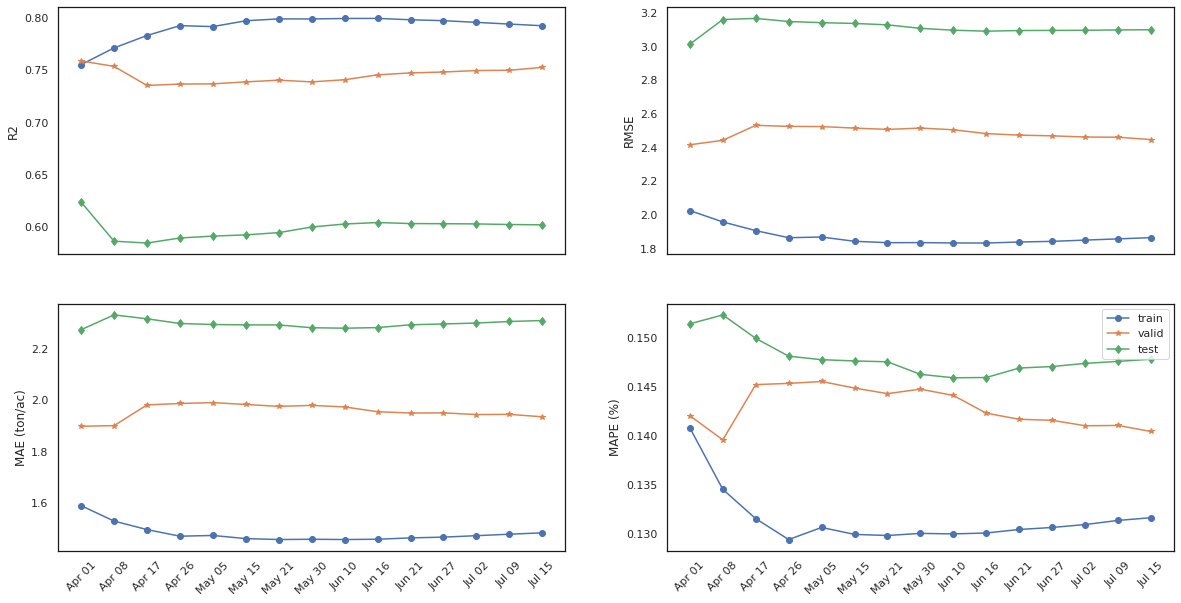

In [22]:
S2_train_df_Y1819 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1819 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1819  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_test.csv',  index_col=0) 

R_Y1819 = Inference.time_series_evaluation_plots(S2_train_df_Y1819, S2_valid_df_Y1819, S2_test_df_Y1819, 'test', save = False)

In [23]:
df2016 = Inference.concat_year_s2(R_Y1716, R_Y1816, R_Y1916)
df2017 = Inference.concat_year_s2(R_Y1617, R_Y1817, R_Y1917)
df2018 = Inference.concat_year_s2(R_Y1618, R_Y1718, R_Y1918)
df2019 = Inference.concat_year_s2(R_Y1619, R_Y1719, R_Y1819)
S2_all = Inference.S2_mean_eval(df2016, df2017, df2018, df2019)

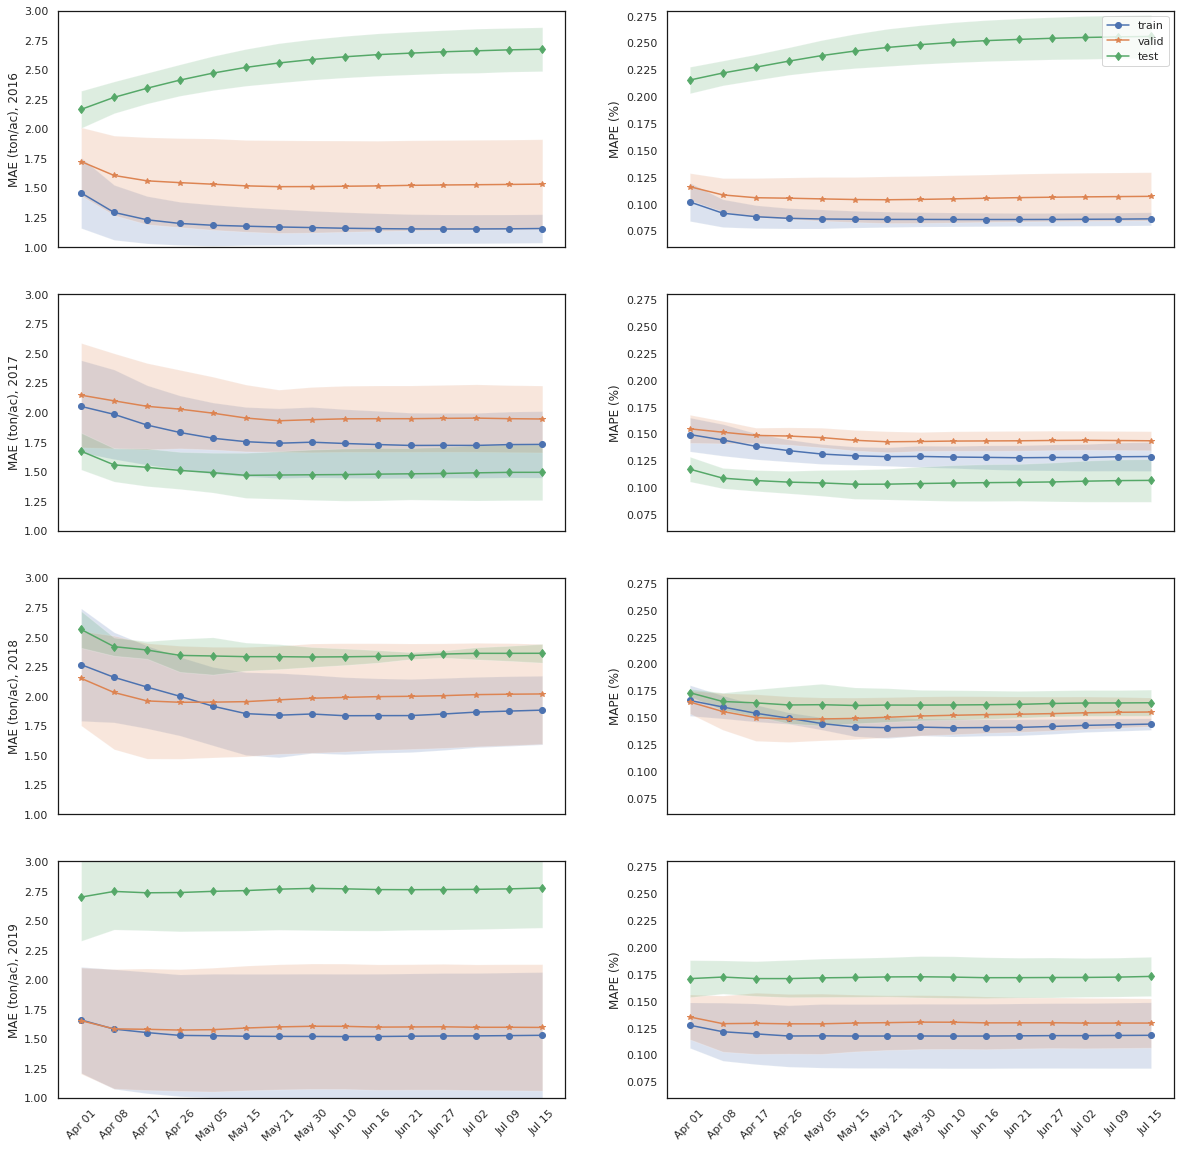

In [25]:
_ = Inference.time_series_year_hold_out_evaluation(df2016, df2017, df2018, df2019)

## Block Hold Out Performance

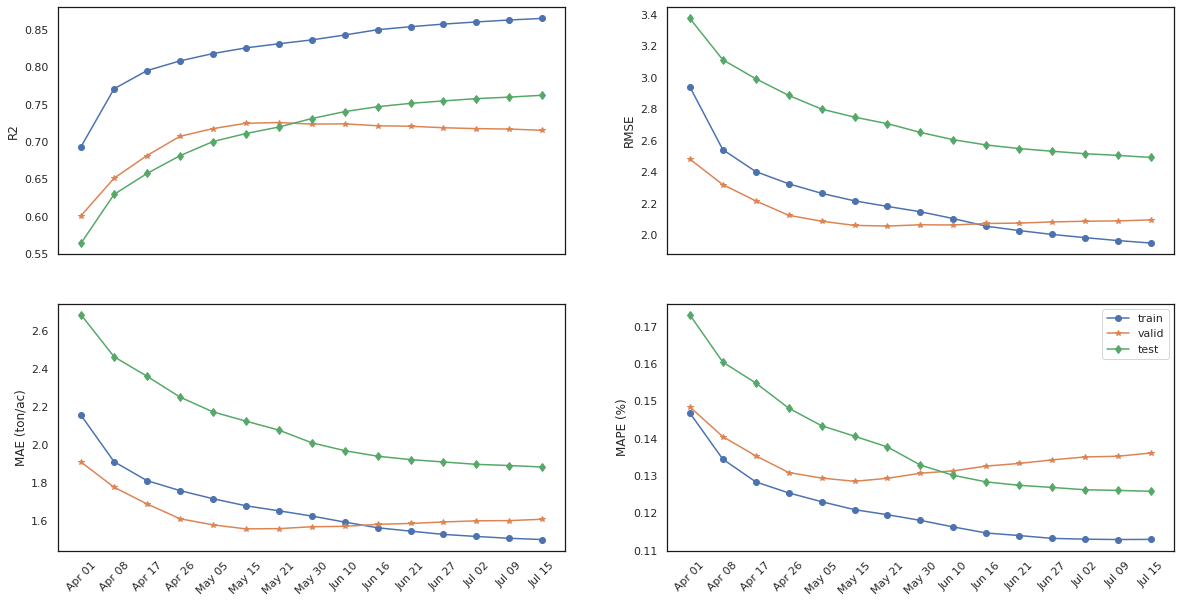

In [27]:
S3_train_df_10m = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train.csv', index_col=0)
S3_valid_df_10m = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid.csv', index_col=0) 
S3_test_df_10m  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test.csv',  index_col=0) 

S3_fig_save_name_01 = '/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_10m/S3_timeseries_10m.png'
S3_R =  Inference.time_series_evaluation_plots(S3_train_df_10m, S3_valid_df_10m, S3_test_df_10m, S3_fig_save_name_01, save = False)

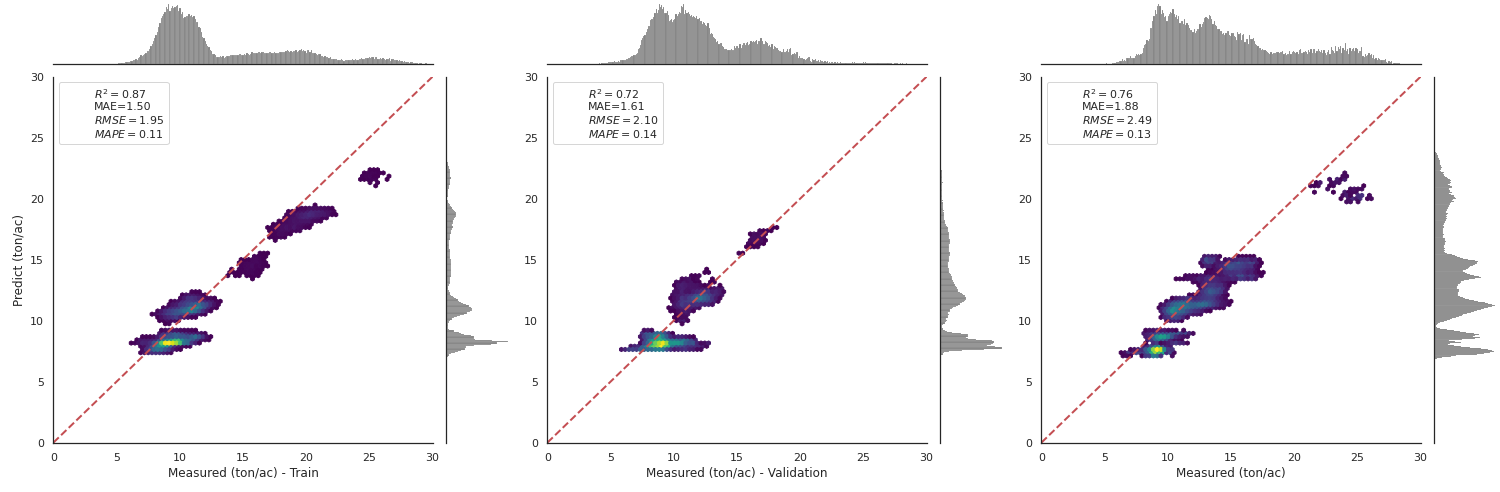

In [28]:
_ = Inference.train_val_test_satterplot(S3_train_df_10m, S3_valid_df_10m, S3_test_df_10m, week = 15, cmap  = 'viridis', mincnt = 2000)

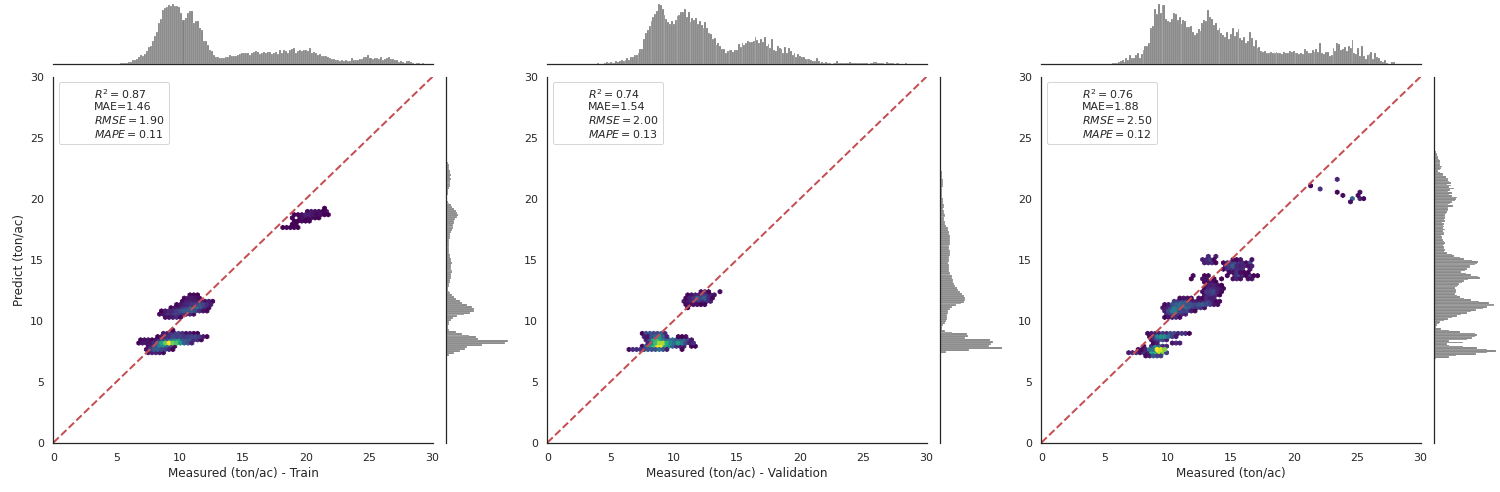

In [29]:
S3_train_df_20 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_20m.csv', index_col=0)
S3_valid_df_20 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_20m.csv', index_col=0) 
S3_test_df_20  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_20m.csv',  index_col=0) 

_ = Inference.train_val_test_satterplot(S3_train_df_20, S3_valid_df_20, S3_test_df_20, week = 15, cmap  = 'viridis', mincnt = 1000)

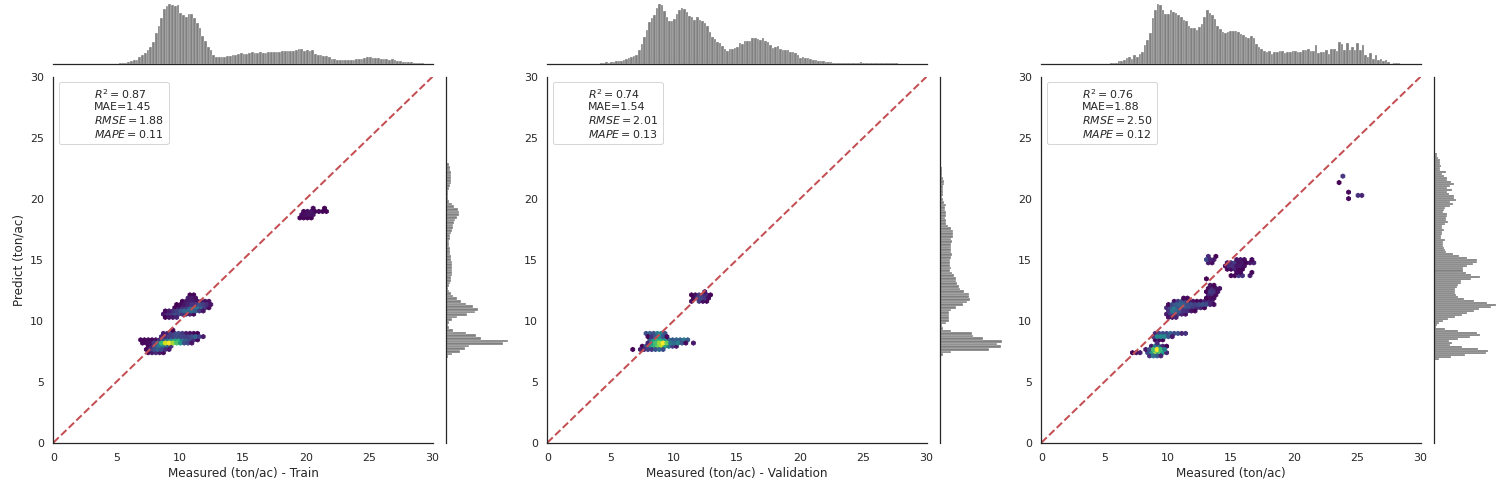

In [23]:
S3_train_df_30 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_30m.csv', index_col=0)
S3_valid_df_30 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_30m.csv', index_col=0) 
S3_test_df_30  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_30m.csv',  index_col=0) 

_ = utils.train_val_test_satterplot(S3_train_df_30, S3_valid_df_30, S3_test_df_30, week = 15, cmap  = 'viridis', mincnt = 500)

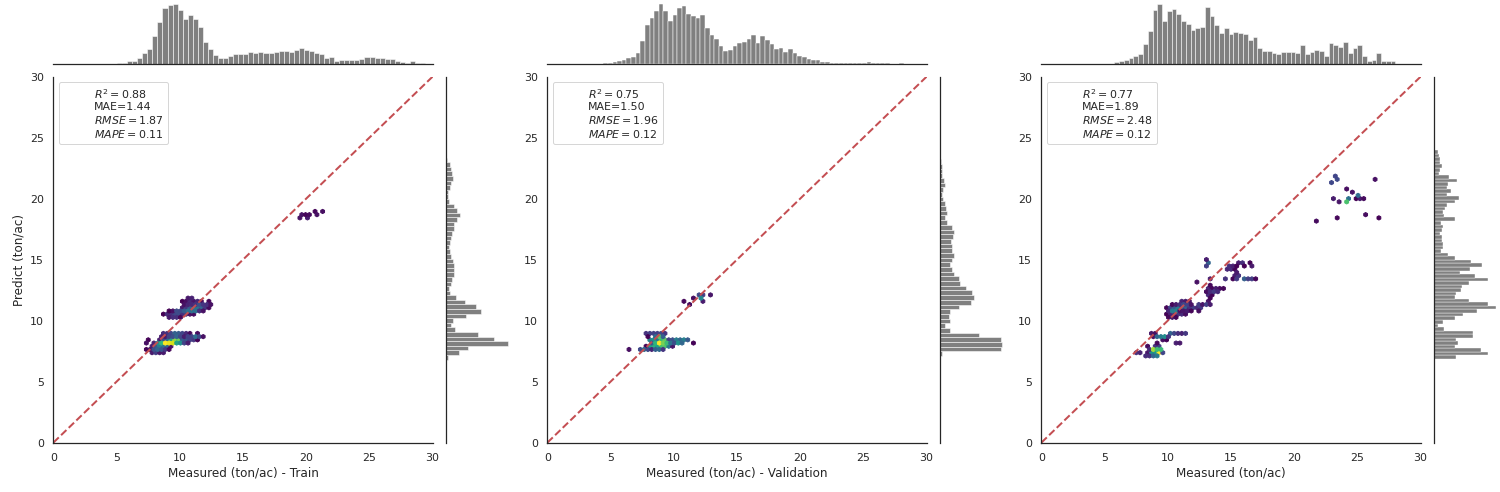

In [30]:
S3_train_df_60 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_60m.csv', index_col=0)
S3_valid_df_60 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_60m.csv', index_col=0) 
S3_test_df_60  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_60m.csv',  index_col=0) 

_ = Inference.train_val_test_satterplot(S3_train_df_60, S3_valid_df_60, S3_test_df_60, week = 15, cmap  = 'viridis', mincnt = 100)

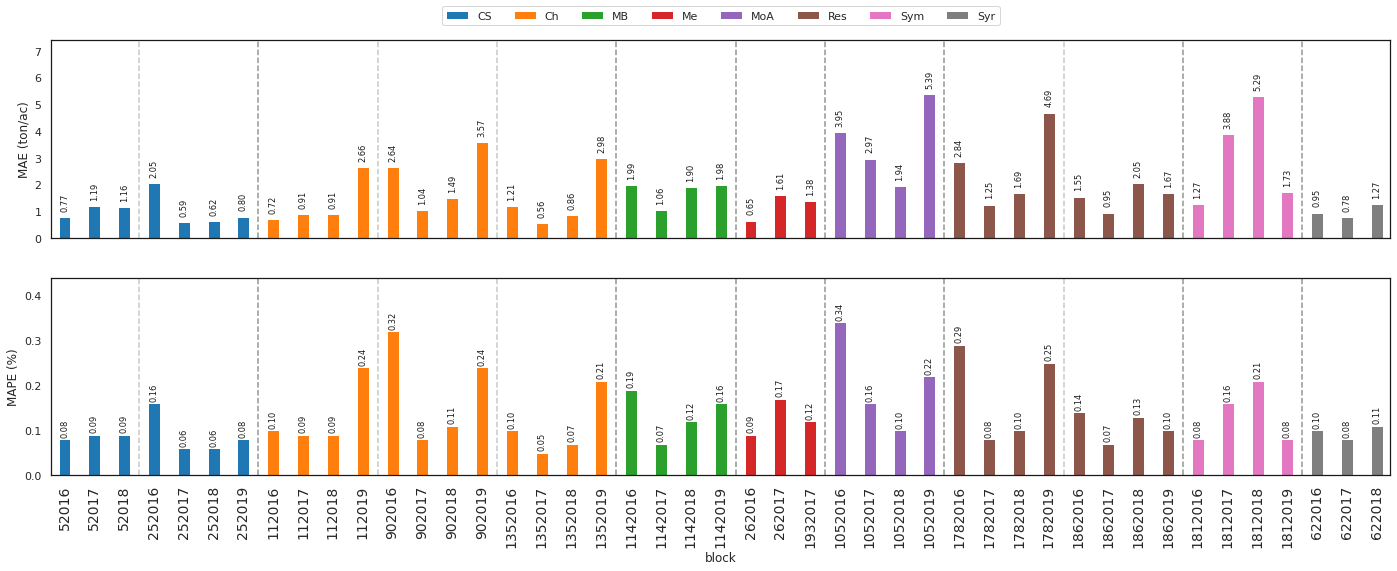

In [33]:
BC_S3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_bc1.csv', index_col=0)
S3_time_blocks, S3_time_cultivars = Inference.block_cultivar_test_csv_results_2d(BC_S3, week = 'ypred_w15', save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time', save_csv_name = 'ConvLSTM_10m_time_')

_ = Inference.block_eval_barplot_S3(S3_time_blocks, cultivar_list = None, block_list = None)

## Block Level Performance Evaluation 

In [ ]:
this_block_df, ytrue, ypred = Inference.block_true_pred_mtx(BC_S3, 1862017, aggregation = False, spatial_resolution = 10)
_= Inference.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

(46080, 20)


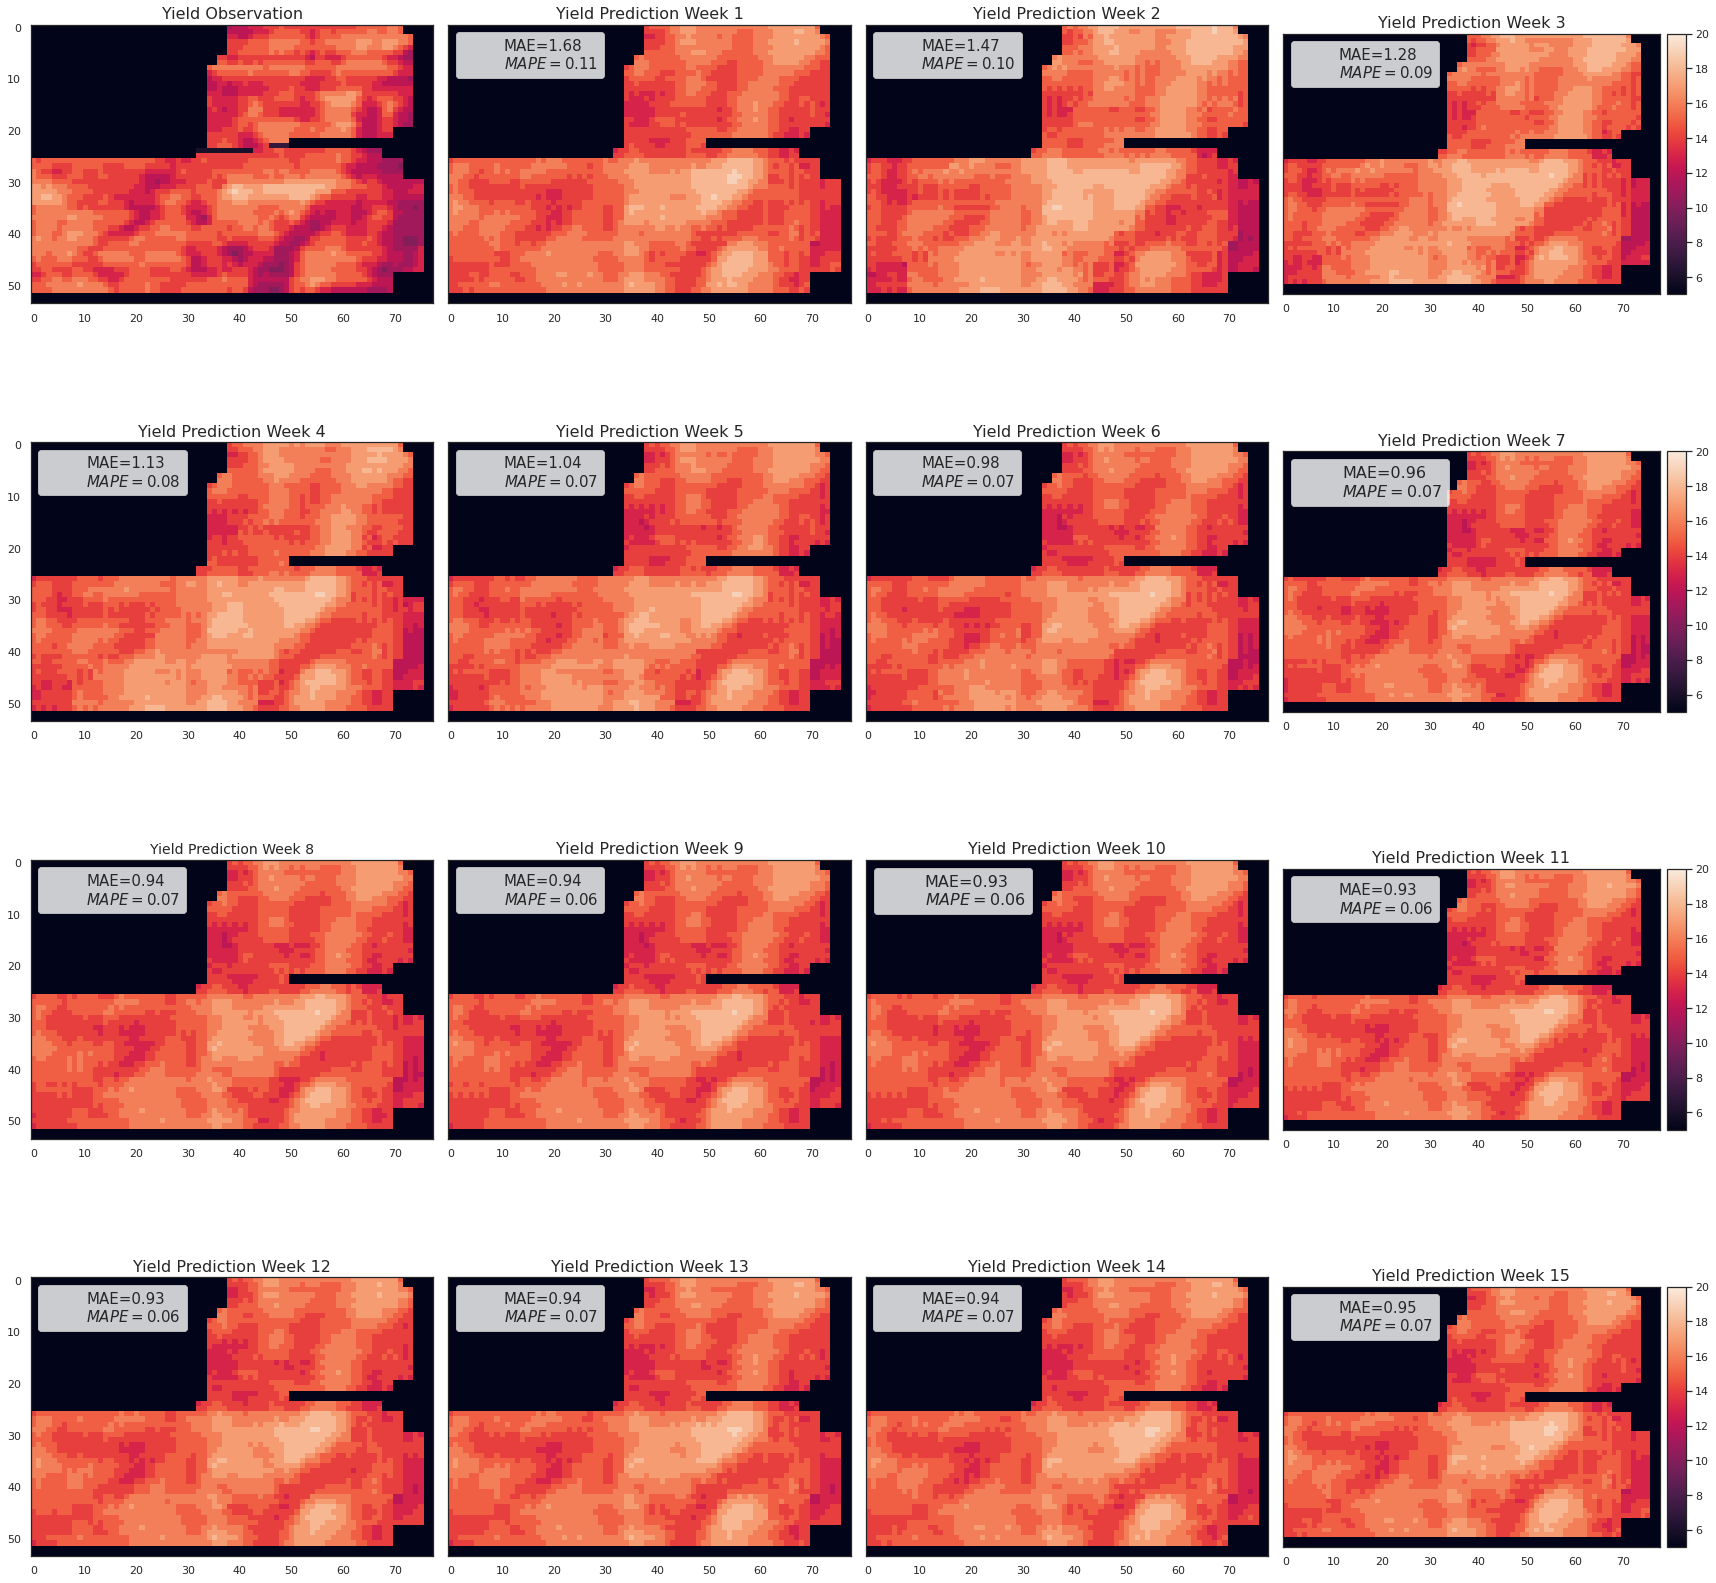

In [35]:
BC_S3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_bc1.csv', index_col=0)
df_1862017 = Inference.block_true_pred_mtx_timeseries(BC_S3, 1862017, aggregation = None, spatial_resolution  = 10)

In [ ]:
this_block_df, ytrue, ypred = Inference.block_true_pred_mtx(BC_S3, 252019, aggregation = False, spatial_resolution = 10) 
_ = Inference.yield_true_pred_plot(ytrue, ypred, min_v = 11, max_v = 45)

In [ ]:
this_block_df, ytrue, ypred = Inference.block_true_pred_mtx(BC_S3, 1052018, aggregation = False, spatial_resolution = 10)
_= Inference.yield_true_pred_plot(ytrue, ypred, min_v = 11, max_v = 45)

## Overall analysis on 10m performance: 

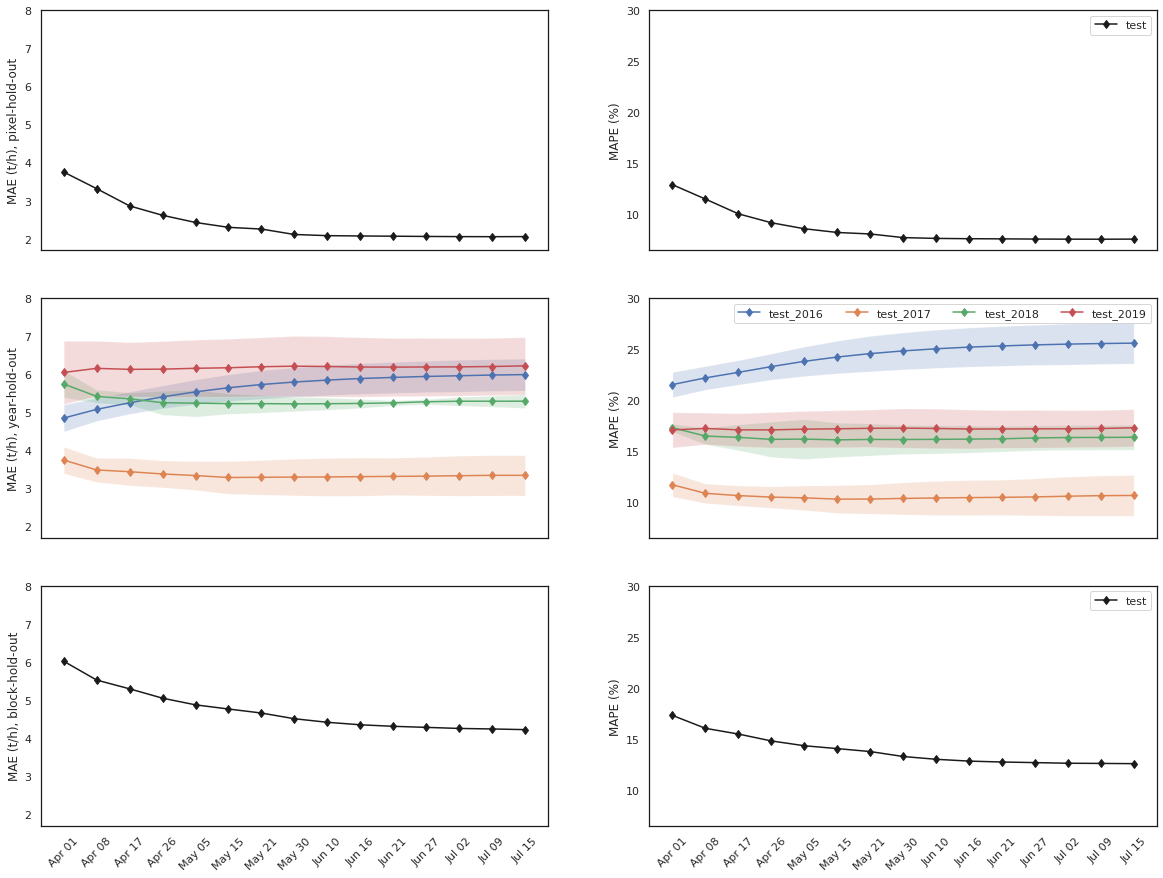

In [42]:
_ = Inference.timeseries_10m_all(R_S1, df2016, df2017, df2018, df2019, S3_R)